In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve

In [4]:
df=pd.read_csv("ParisHousing.csv")

In [5]:
df.head()


squareMeters  numberOfRooms  hasYard  hasPool  floors  cityCode  \
0         75523              3        0        1      63      9373   
1         80771             39        1        1      98     39381   
2         55712             58        0        1      19     34457   
3         32316             47        0        0       6     27939   
4         70429             19        1        1      90     38045   

   cityPartRange  numPrevOwners  made  isNewBuilt  hasStormProtector  \
0              3              8  2005           0                  1   
1              8              6  2015           1                  0   
2              6              8  2021           0                  0   
3             10              4  2012           0                  1   
4              3              7  1990           1                  0   

   basement  attic  garage  hasStorageRoom  hasGuestRoom      price  
0      4313   9005     956               0             7  7559081.5  
1      3653   2436     128               1             2  8085989.5  
2      2937   8852     135               1             9  5574642.1  
3       659   7141     359               0             3  3232561.2  
4      8435   2429     292               1             4  7055052.0

In [49]:
df.isnull().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [51]:
df['hasYard'].unique()

array([0, 1], dtype=int64)

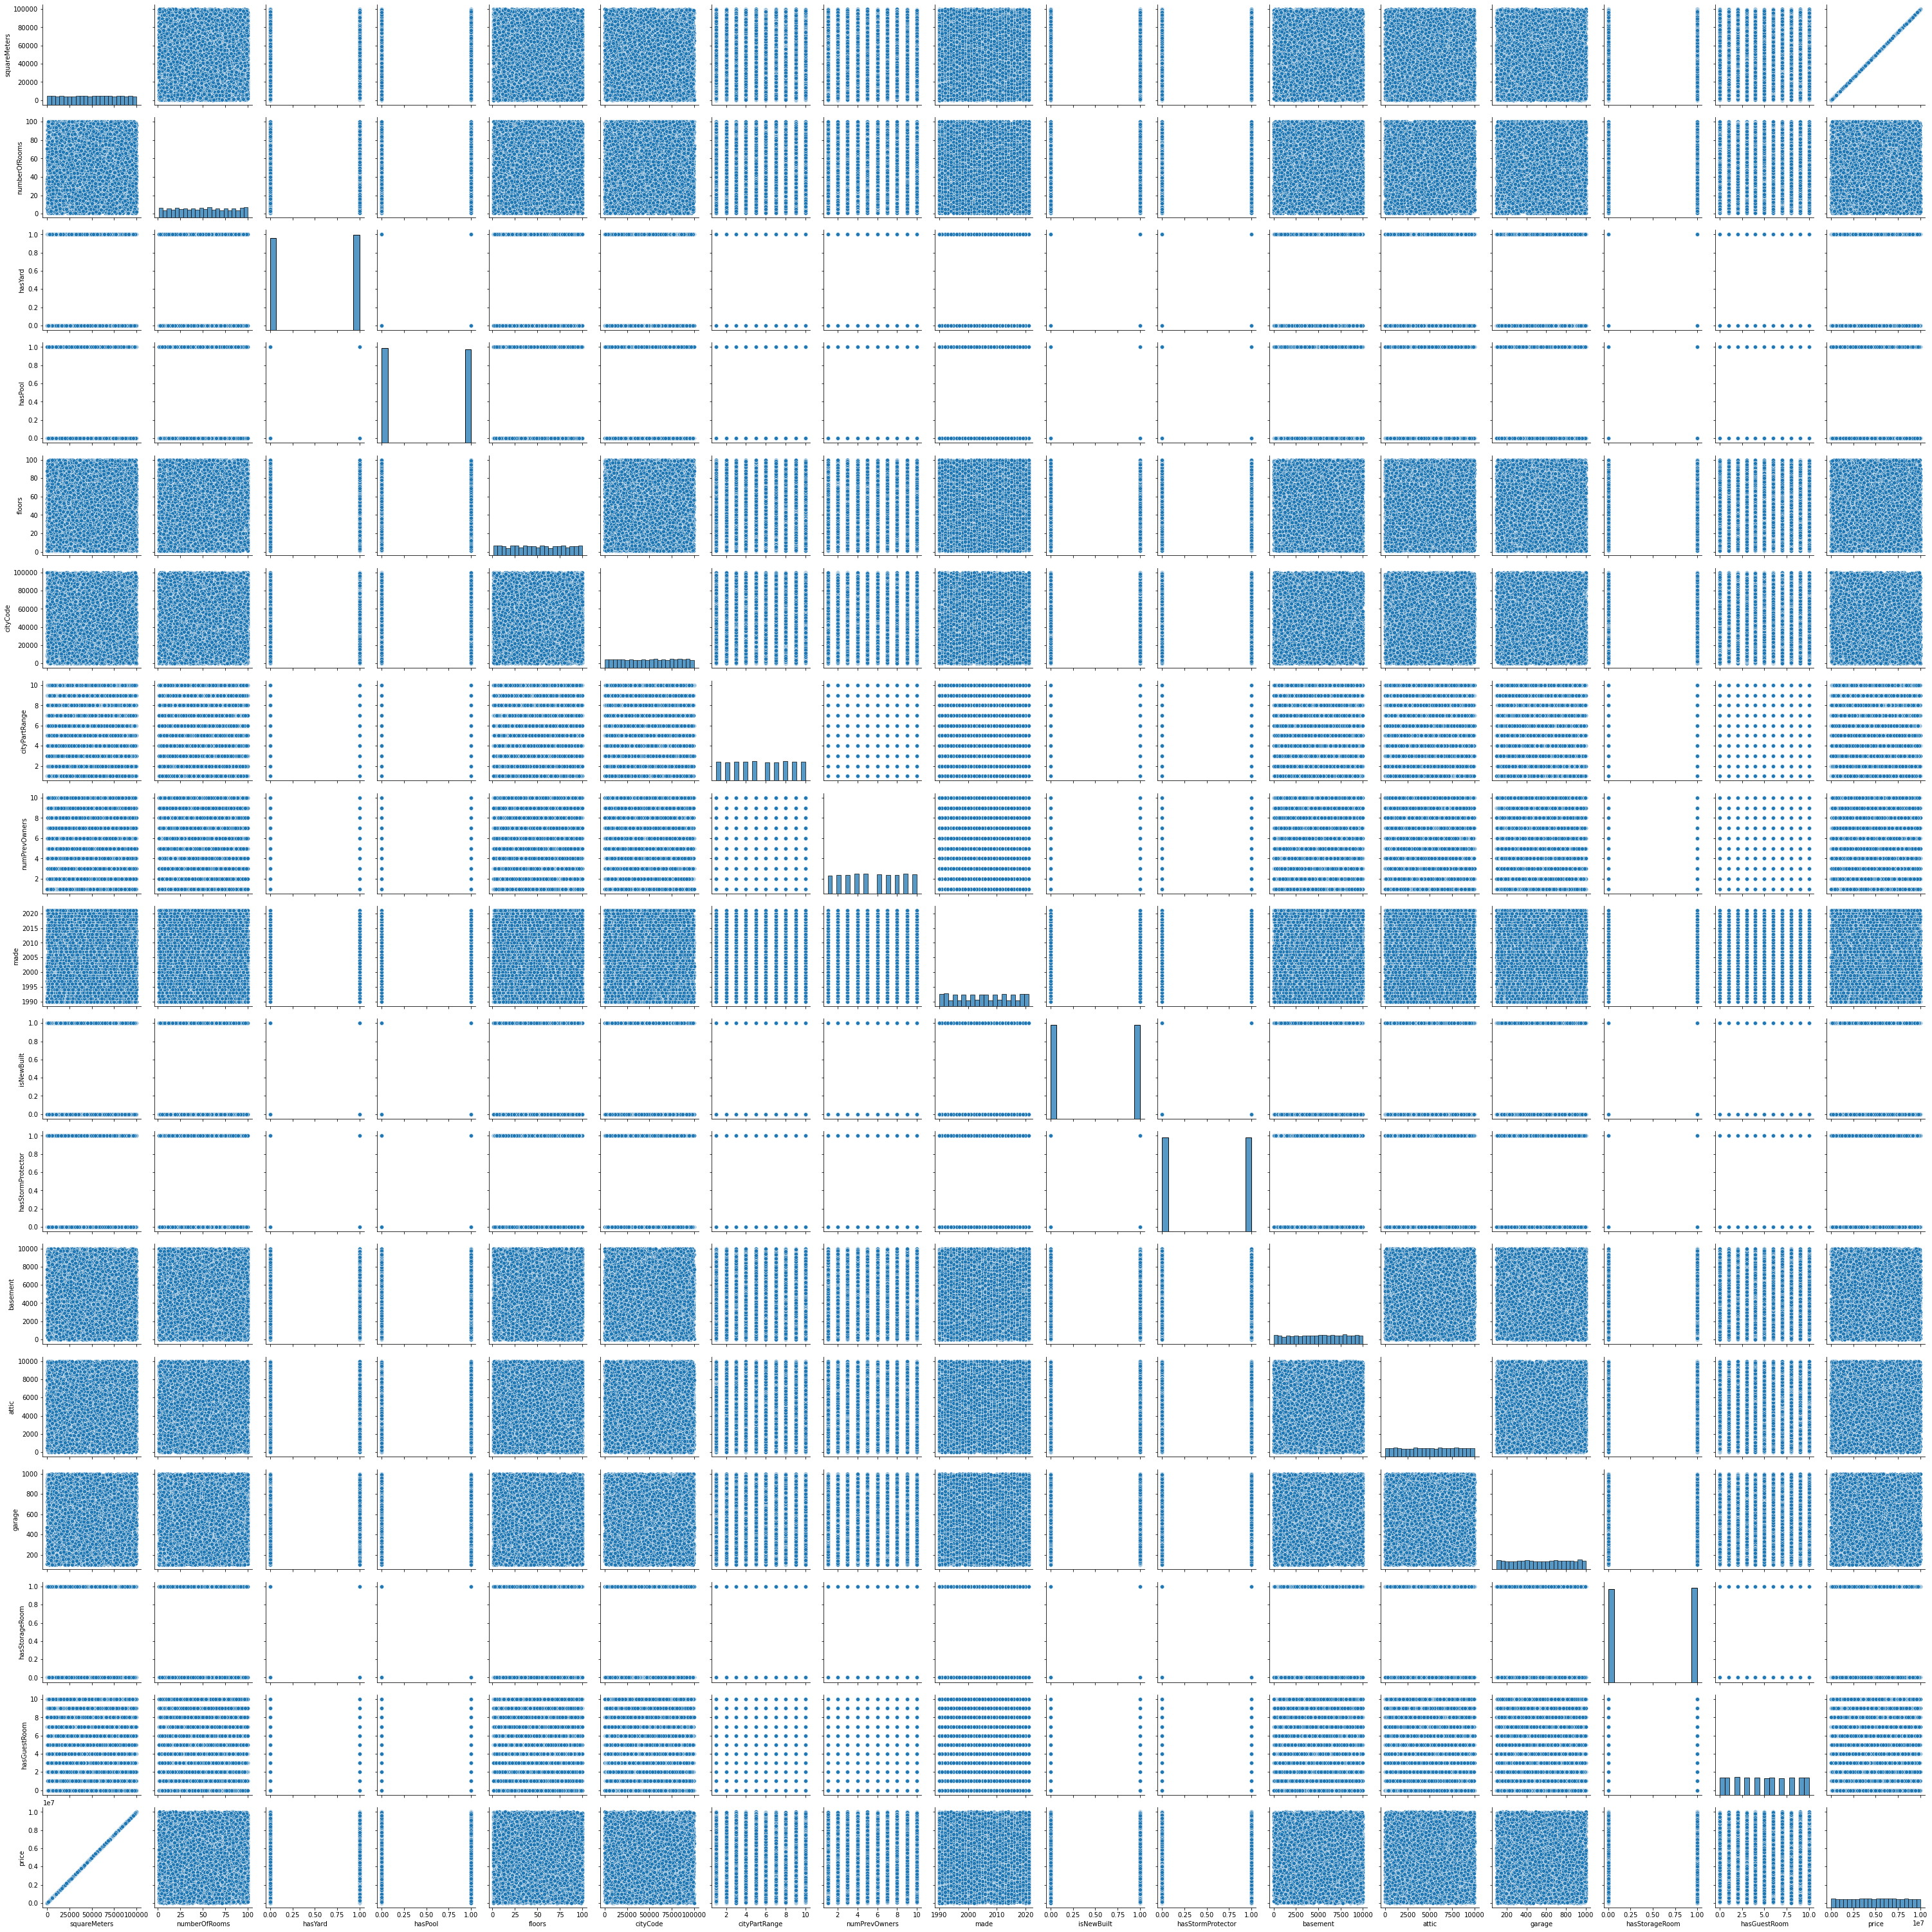

In [25]:
sns.pairplot(df)

<AxesSubplot:>

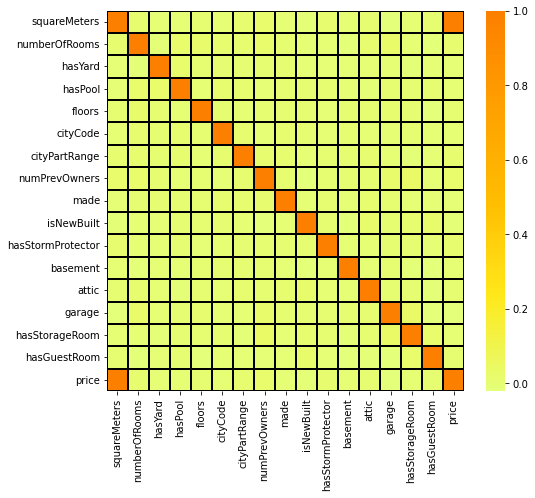

In [8]:
fig = plt.figure(figsize = (8,7))
data_ploting = df.corr(method= 'pearson')
sns.heatmap(data_ploting, cmap='Wistia', linecolor='black', linewidths= 2 )

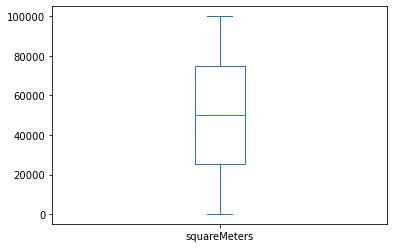

In [9]:
#outlier check
df['squareMeters'].plot(kind="box",subplots=True);

In [10]:
X = pd.DataFrame(np.c_[df['squareMeters']], columns = ['squareMeters'])
Y = df['price']

In [12]:
def evaluate(model, X, y):
    predictions = model.predict(X)
    errors = abs(predictions - y)
    mape = 100 * np.mean(errors / y)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, 
random_state=42)

In [53]:
def stdscaler(x_train, x_test):
  scaler = StandardScaler()
  x_train = scaler.fit_transform(x_train)
  x_test = scaler.fit_transform(x_test)
  return x_train, x_test

LINEAR REG

Random forest

In [54]:
from sklearn.ensemble import RandomForestRegressor
regg=RandomForestRegressor()
regg.fit(x_train,y_train)
regg.predict(x_test)

array([7958629.795     , 3711355.455     , 8552805.12499999, ...,
       1207264.768     , 1938687.644     , 4534710.04400001])

In [55]:
evaluate(regg,x_train,y_train)

Model Performance
Average Error: 1225.5155 degrees.
Accuracy = 99.91%.


99.91383956909232

In [56]:
evaluate(regg,x_test,y_test)

Model Performance
Average Error: 3266.0127 degrees.
Accuracy = 99.73%.


99.73494753560573

In [57]:
y_pred = regg.predict(x_test)

In [58]:
import sklearn.metrics as metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)

print('MAE (Mean-Absolute-Error): %s' %mae)
print('MSE (Mean-Squared-Error): %s' %mse)
print('RMSE (Root-MSE): %s' %rmse)
print('R2 score: %s' %r2)

MAE (Mean-Absolute-Error): 2620.066215418165
MSE (Mean-Squared-Error): 10489874.845938126
RMSE (Root-MSE): 3238.807627189075
R2 score: 0.999998762678289


<AxesSubplot:title={'center':'Prediction Error for Lasso'}, xlabel='$y$', ylabel='$\\hat{y}$'>

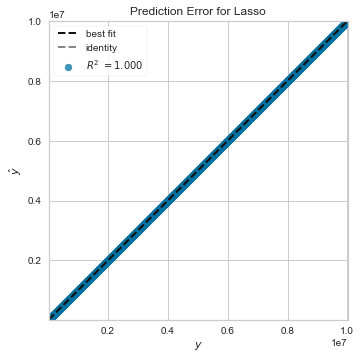

In [31]:
from sklearn.linear_model import Lasso
from yellowbrick.regressor import PredictionError
# Instantiate the linear model and visualizer
Lm = Lasso()
visualizer = PredictionError(Lm) 
# fit visualizer on training data
visualizer.fit(x_train, y_train) 
#Evaluate on test data
visualizer.score(x_test, y_test)
#show the plot and save in given path
visualizer.show("prediction_error.jpg")

In [2]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(regg, file)

NameError: name 'regg' is not defined